# Nonlinear Relationships

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns   
sns.set(color_codes=True)
import matplotlib.pyplot as plt 
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [2]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y = boston_dataset.target

## Brief Decision Tree Intro

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
X = boston[['LSTAT']].values

In [7]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [13]:
# convert to array, and sort values
sort_idx = X.flatten().argsort()

Text(0, 0.5, 'MEDV')

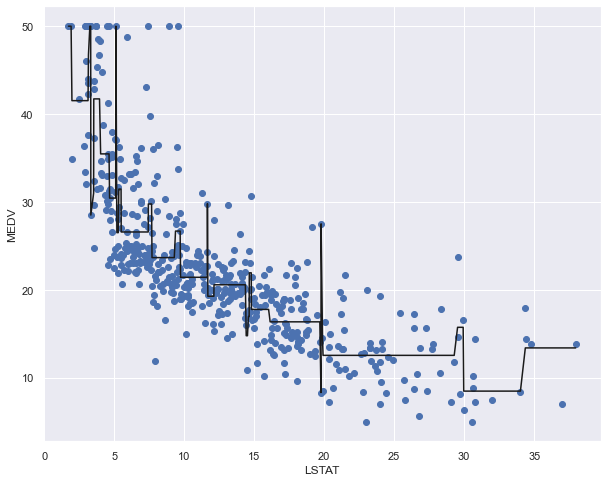

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

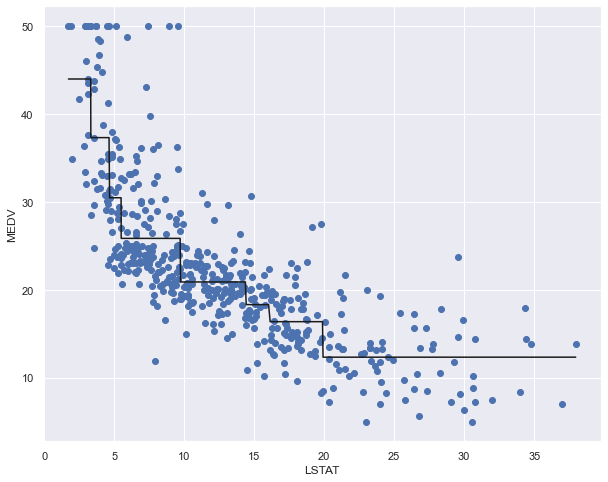

In [22]:
# overfit! decrease depth 
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

## Brief Random Forest Intro

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [35]:
X = boston.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [36]:
forest = RandomForestRegressor(
    n_estimators=500, criterion='mse', random_state=0, n_jobs=-1
)

In [37]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)

In [48]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [49]:
print('MSE Train:', mean_squared_error(y_train, y_train_pred))
print('MSE Test:', mean_squared_error(y_test, y_test_pred))
print('R2 Train:', r2_score(y_train, y_train_pred))
print('R2 Test:', r2_score(y_test, y_test_pred))

MSE Train: 1.3733146326553607
MSE Test: 14.635974985789463
R2 Train: 0.9837984720676507
R2 Test: 0.8242252229712641


## Brief Intro to AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostRegressor

In [51]:
ada = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3), n_estimators=500, random_state=0
)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=500, random_state=0)

In [52]:
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
print('MSE Train:', mean_squared_error(y_train, y_train_pred))
print('MSE Test:', mean_squared_error(y_test, y_test_pred))
print('R2 Train:', r2_score(y_train, y_train_pred))
print('R2 Test:', r2_score(y_test, y_test_pred))

MSE Train: 5.462998150330014
MSE Test: 21.243303742681352
R2 Train: 0.9355508817700364
R2 Test: 0.7448726864900341


## Feature Importances

### AdaBoost

In [53]:
ada.feature_importances_

array([0.01880417, 0.00286703, 0.01445221, 0.00516464, 0.02949651,
       0.30114753, 0.01294853, 0.08603338, 0.00329178, 0.05192477,
       0.07084219, 0.02010542, 0.38292184])

In [55]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

<AxesSubplot:>

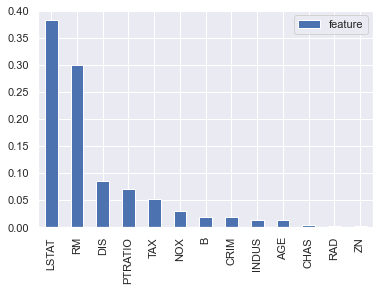

In [57]:
result = pd.DataFrame(ada.feature_importances_, boston.columns)
result.columns = ['feature']
res_sorted = result.sort_values(by='feature', ascending=False)
res_sorted.plot(kind='bar')

### Random Forest

<AxesSubplot:>

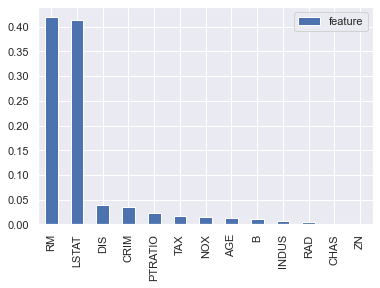

In [58]:
result = pd.DataFrame(forest.feature_importances_, boston.columns)
result.columns = ['feature']
res_sorted = result.sort_values(by='feature', ascending=False)
res_sorted.plot(kind='bar')

### Fitting and Evaluating Decision Tree

In [59]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
print('MSE Train:', mean_squared_error(y_train, y_train_pred))
print('MSE Test:', mean_squared_error(y_test, y_test_pred))
print('R2 Train:', r2_score(y_train, y_train_pred))
print('R2 Test:', r2_score(y_test, y_test_pred))

MSE Train: 12.61901452384361
MSE Test: 28.069857549754033
R2 Train: 0.8511285677547421
R2 Test: 0.6628873063238392


<AxesSubplot:>

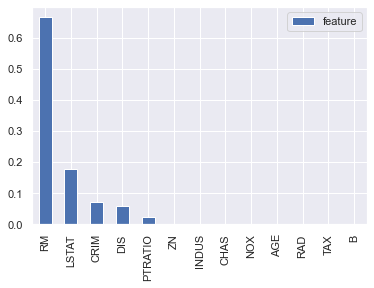

In [60]:
result = pd.DataFrame(tree.feature_importances_, boston.columns)
result.columns = ['feature']
res_sorted = result.sort_values(by='feature', ascending=False)
res_sorted.plot(kind='bar')